In [ ]:
#keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout
from keras.layers.embeddings import Embedding
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# NLTK
import nltk
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

#cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def clean_text(col):
    corpus=[]
    for i in range(0,len(col)):
        text=str(col[i])
        text=re.sub('[^a-zA-Z]',' ',text)
        
        text=[lemma.lemmatize(w) for w in word_tokenize(str(text).lower())]
        text=' '.join(text)
        corpus.append(text)
    return corpus

In [ ]:
df = pd.read_csv( 'data.csv', encoding = 'latin1')
df['clean_text']=clean_text(df.description.values)
df.head()

,ID,label,description,Unnamed: 3,Unnamed: 4,clean_text
0,7.673993e+07,2,Medical Doctor,NaN,NaN,medical doctor
1,2.969993e+07,1,"Navigator, Investigator, Healthcare Reformer, ...",NaN,NaN,navigator investigator healthcare reformer nur...
2,4.067934e+08,4,"Pharmacist, vocalist, photographer and a co...",NaN,NaN,pharmacist vocalist photographer and a compute...
3,1.338325e+08,2,Proud to serve the nation for 35 years as a do...,NaN,NaN,proud to serve the nation for year a a doctor
4,1.080000e+18,2,Doctor by profession,NaN,NaN,doctor by profession


In [ ]:
del df['Unnamed: 3']
del df['Unnamed: 4']

In [ ]:
df.head()

,ID,label,description,clean_text
0,7.673993e+07,2,Medical Doctor,medical doctor
1,2.969993e+07,1,"Navigator, Investigator, Healthcare Reformer, ...",navigator investigator healthcare reformer nur...
2,4.067934e+08,4,"Pharmacist, vocalist, photographer and a co...",pharmacist vocalist photographer and a compute...
3,1.338325e+08,2,Proud to serve the nation for 35 years as a do...,proud to serve the nation for year a a doctor
4,1.080000e+18,2,Doctor by profession,doctor by profession


In [ ]:
Y = df.iloc[:,1]
X = df.iloc[:,3]

In [ ]:
from keras.utils import to_categorical
X = df['clean_text']
#test_set = test['clean review']
#Y = train['Sentiment']
Y = to_categorical(df['label'].values)
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(6077,) (6077, 9)
(676,) (676, 9)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [ ]:
all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
#print(all_words)
dist=FreqDist(all_words)

num_unique_word=len(dist)
num_unique_word

13322

In [ ]:
r_len=[]
for text in X_train:
    word=word_tokenize(text)
  #  print(text)
    l=len(word)
    r_len.append(l)
    
MAX_REVIEW_LEN=np.max(r_len)
MAX_REVIEW_LEN

35

In [ ]:
max_features = num_unique_word
max_words = MAX_REVIEW_LEN
batch_size = 128
epochs = 10
num_classes=9

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)

In [ ]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adamax
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
model2=Sequential()
model2.add(Embedding(max_features,100,mask_zero=True))

model2.add(Bidirectional(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True)))
model2.add(Bidirectional(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False)))
model2.add(Dense(num_classes,activation='softmax'))


model2.compile(loss='categorical_crossentropy',optimizer=Adamax(lr=0.001),metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1332200   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         84480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 9)                 585       
Total params: 1,458,481
Trainable params: 1,458,481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
48/48 [==============================] - 29s 611ms/step - loss: 1.9127 - accuracy: 0.3487 - val_loss: 1.6919 - val_accuracy: 0.3713
Epoch 2/10
48/48 [==============================] - 28s 581ms/step - loss: 1.5577 - accuracy: 0.5330 - val_loss: 1.2514 - val_accuracy: 0.7204
Epoch 3/10
48/48 [==============================] - 29s 597ms/step - loss: 0.9556 - accuracy: 0.7596 - val_loss: 0.7528 - val_accuracy: 0.7959
Epoch 4/10
48/48 [==============================] - 28s 585ms/step - loss: 0.6415 - accuracy: 0.8292 - val_loss: 0.5728 - val_accuracy: 0.8506
Epoch 5/10
48/48 [==============================] - 29s 612ms/step - loss: 0.5094 - accuracy: 0.8707 - val_loss: 0.5045 - val_accuracy: 0.8609
Epoch 6/10
48/48 [==============================] - 29s 600ms/step - loss: 0.4333 - accuracy: 0.8853 - val_loss: 0.4445 - val_accuracy: 0.8698
Epoch 7/10
48/48 [==============================] - 29s 594ms/step - loss: 0.3752 - accuracy: 0.9011 - val_loss: 0.4020 - val_accuracy: 0.8846

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(Y_val, axis=1) # Convert one-hot to index
y_pred = model2.predict_classes(X_val)
print(classification_report(Y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           1       0.95      0.96      0.96       169
           2       0.98      0.94      0.96       181
           3       0.59      0.61      0.60        33
           4       0.76      0.98      0.86        49
           5       0.95      0.96      0.96       175
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         6
           8       0.80      0.96      0.87        50

    accuracy                           0.91       676
   macro avg       0.63      0.68      0.65       676
weighted avg       0.89      0.91      0.90       676



In [ ]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential

In [ ]:
model3 = Sequential()

# Input / Embdedding
model3.add(Embedding(max_features, 150, input_length=max_words))

# CNN
model3.add(SpatialDropout1D(0.2))

model3.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))

model3.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))

model3.add(Flatten())

# Output layer
model3.add(Dense(9, activation='sigmoid'))

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.001),metrics=['accuracy'])
#model3.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)


In [ ]:
model3.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
48/48 [==============================] - 1s 16ms/step - loss: 1.8844 - accuracy: 0.2852 - val_loss: 1.7075 - val_accuracy: 0.2751
Epoch 2/10
48/48 [==============================] - 1s 11ms/step - loss: 1.6695 - accuracy: 0.3108 - val_loss: 1.6581 - val_accuracy: 0.3166
Epoch 3/10
48/48 [==============================] - 1s 11ms/step - loss: 1.5945 - accuracy: 0.3237 - val_loss: 1.5525 - val_accuracy: 0.2840
Epoch 4/10
48/48 [==============================] - 1s 12ms/step - loss: 1.4485 - accuracy: 0.3169 - val_loss: 1.3682 - val_accuracy: 0.3136
Epoch 5/10
48/48 [==============================] - 1s 11ms/step - loss: 1.1734 - accuracy: 0.4764 - val_loss: 0.9351 - val_accuracy: 0.6169
Epoch 6/10
48/48 [==============================] - 1s 11ms/step - loss: 0.8163 - accuracy: 0.7168 - val_loss: 0.7033 - val_accuracy: 0.7633
Epoch 7/10
48/48 [==============================] - 1s 11ms/step - loss: 0.6368 - accuracy: 0.7987 - val_loss: 0.6028 - val_accuracy: 0.7914
Epoch 8/10
48

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(Y_val, axis=1) # Convert one-hot to index
y_pred = model3.predict_classes(X_val)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.96      0.98       169
           2       1.00      0.90      0.95       181
           3       0.50      0.27      0.35        33
           4       0.39      0.53      0.45        49
           5       0.85      0.98      0.91       175
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         6
           8       0.55      0.70      0.61        50

    accuracy                           0.84       676
   macro avg       0.54      0.54      0.53       676
weighted avg       0.83      0.84      0.83       676



In [ ]:
model1=Sequential()
model1.add(Embedding(max_features,128,mask_zero=True))
#model1.add(LSTM(128,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model1.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model1.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model1.add(Dense(num_classes,activation='softmax'))


model1.compile(loss='categorical_crossentropy',optimizer=Adamax(lr=0.001),metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1705216   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 297       
Total params: 1,767,337
Trainable params: 1,767,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
48/48 [==============================] - 16s 330ms/step - loss: 1.9257 - accuracy: 0.3615 - val_loss: 1.7003 - val_accuracy: 0.3669
Epoch 2/10
48/48 [==============================] - 15s 307ms/step - loss: 1.6524 - accuracy: 0.4041 - val_loss: 1.4935 - val_accuracy: 0.4926
Epoch 3/10
48/48 [==============================] - 15s 304ms/step - loss: 1.3197 - accuracy: 0.5379 - val_loss: 1.1827 - val_accuracy: 0.5311
Epoch 4/10
48/48 [==============================] - 15s 307ms/step - loss: 1.0710 - accuracy: 0.6255 - val_loss: 0.9519 - val_accuracy: 0.7145
Epoch 5/10
48/48 [==============================] - 15s 319ms/step - loss: 0.8375 - accuracy: 0.7841 - val_loss: 0.7055 - val_accuracy: 0.8506
Epoch 6/10
48/48 [==============================] - 16s 339ms/step - loss: 0.6631 - accuracy: 0.8498 - val_loss: 0.5943 - val_accuracy: 0.8624
Epoch 7/10
48/48 [==============================] - 16s 328ms/step - loss: 0.5460 - accuracy: 0.8789 - val_loss: 0.5210 - val_accuracy: 0.8713

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(Y_val, axis=1) # Convert one-hot to index
y_pred = model1.predict_classes(X_val)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97       169
           2       0.97      0.94      0.96       181
           3       0.92      0.33      0.49        33
           4       0.55      0.94      0.69        49
           5       0.95      0.97      0.96       175
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         6
           8       0.81      0.94      0.87        50

    accuracy                           0.90       676
   macro avg       0.65      0.64      0.62       676
weighted avg       0.89      0.90      0.88       676



In [ ]:
model4= Sequential()
model4.add(Embedding(max_features,100,input_length=max_words))
model4.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Dropout(0.5))
model4.add(GRU(128,return_sequences=True))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(9,activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer=Adamax(lr=0.001),metrics=['accuracy'])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 35, 100)           1332200   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 35, 64)            19264     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 17, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 17, 64)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 17, 128)           74496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 17, 128)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2176)             

In [ ]:
model4.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
48/48 [==============================] - 1s 19ms/step - loss: 1.8113 - accuracy: 0.2776 - val_loss: 1.6899 - val_accuracy: 0.3521
Epoch 2/10
48/48 [==============================] - 1s 11ms/step - loss: 1.6610 - accuracy: 0.3059 - val_loss: 1.5217 - val_accuracy: 0.4186
Epoch 3/10
48/48 [==============================] - 1s 11ms/step - loss: 1.2775 - accuracy: 0.5169 - val_loss: 0.9128 - val_accuracy: 0.7337
Epoch 4/10
48/48 [==============================] - 1s 11ms/step - loss: 0.8082 - accuracy: 0.7293 - val_loss: 0.6125 - val_accuracy: 0.7899
Epoch 5/10
48/48 [==============================] - 1s 11ms/step - loss: 0.6211 - accuracy: 0.7945 - val_loss: 0.5179 - val_accuracy: 0.8047
Epoch 6/10
48/48 [==============================] - 1s 11ms/step - loss: 0.5283 - accuracy: 0.8243 - val_loss: 0.4742 - val_accuracy: 0.8180
Epoch 7/10
48/48 [==============================] - 1s 11ms/step - loss: 0.4753 - accuracy: 0.8452 - val_loss: 0.4317 - val_accuracy: 0.8462
Epoch 8/10
48

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(Y_val, axis=1) # Convert one-hot to index
y_pred = model4.predict_classes(X_val)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.96      0.97       169
           2       0.98      0.96      0.97       181
           3       0.37      0.21      0.27        33
           4       0.58      0.98      0.73        49
           5       0.97      0.96      0.97       175
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         6
           8       0.77      0.94      0.85        50

    accuracy                           0.89       676
   macro avg       0.58      0.63      0.59       676
weighted avg       0.88      0.89      0.88       676



In [ ]:
Y = df.iloc[:,1]
X = df.iloc[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7436352871521611
              precision    recall  f1-score   support

           1       0.87      0.91      0.89       394
           2       0.59      0.90      0.71       477
           3       1.00      0.03      0.06        68
           4       0.97      0.23      0.38       146
           5       0.83      0.94      0.88       434
           6       1.00      0.04      0.08        25
           7       0.00      0.00      0.00        20
           8       1.00      0.21      0.34       125

    accuracy                           0.74      1689
   macro avg       0.78      0.41      0.42      1689
weighted avg       0.80      0.74      0.70      1689



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1)),
               ])

In [ ]:
logreg.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9455298993487271
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       394
           2       0.94      0.96      0.95       477
           3       0.98      0.81      0.89        68
           4       0.97      0.97      0.97       146
           5       0.90      0.99      0.94       434
           6       1.00      0.52      0.68        25
           7       1.00      0.05      0.10        20
           8       0.98      0.98      0.98       125

    accuracy                           0.95      1689
   macro avg       0.97      0.78      0.81      1689
weighted avg       0.95      0.95      0.94      1689



In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=1, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9538188277087034
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       394
           2       0.98      0.93      0.95       477
           3       0.98      0.91      0.95        68
           4       0.97      0.97      0.97       146
           5       0.89      0.99      0.94       434
           6       1.00      0.72      0.84        25
           7       0.93      0.65      0.76        20
           8       0.95      0.98      0.96       125

    accuracy                           0.95      1689
   macro avg       0.96      0.89      0.92      1689
weighted avg       0.96      0.95      0.95      1689



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
   
    #from itertools import zip()
    pc.update_scalarmappable()
    ax = pc.get_axes()
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):

    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):


    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='AlBERT', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

heat map for LSTM

[0.97, 0.96, 0.97]
[0.97, 0.94, 0.96]
[0.62, 0.53, 0.67]
[0.65, 0.74, 0.7]
[0.95, 0.97, 0.96]
[0.3, 0.35, 0.38]
[0.28, 0.2, 0.25]
plotMat: [[0.97, 0.96, 0.97], [0.97, 0.94, 0.96], [0.62, 0.53, 0.67], [0.65, 0.74, 0.7], [0.95, 0.97, 0.96], [0.3, 0.35, 0.38], [0.28, 0.2, 0.25]]
support: [169, 181, 33, 49, 175, 13, 6]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


TypeError: ignored

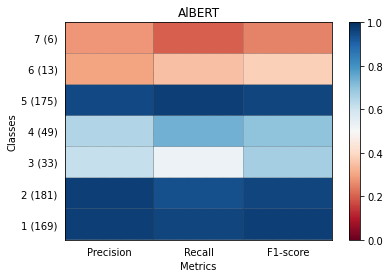

In [ ]:
def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

           1       0.97      0.96      0.97       169
           2       0.97      0.94      0.96       181
           3       0.62      0.53      0.67        33
           4       0.65      0.74      0.70        49
           5       0.95      0.97      0.96       175
           6       0.30      0.35      0.38        13
           7       0.28      0.20      0.25         6
           8       0.81      0.94      0.87        50
"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.pdf', dpi=200, format='pdf', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

heat map for bi-LSTM

[0.95, 0.96, 0.96]
[0.98, 0.94, 0.96]
[0.59, 0.61, 0.6]
[0.76, 0.88, 0.83]
[0.95, 0.96, 0.96]
[0.39, 0.38, 0.38]
[0.3, 0.37, 0.27]
plotMat: [[0.95, 0.96, 0.96], [0.98, 0.94, 0.96], [0.59, 0.61, 0.6], [0.76, 0.88, 0.83], [0.95, 0.96, 0.96], [0.39, 0.38, 0.38], [0.3, 0.37, 0.27]]
support: [169, 181, 33, 49, 175, 13, 6]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

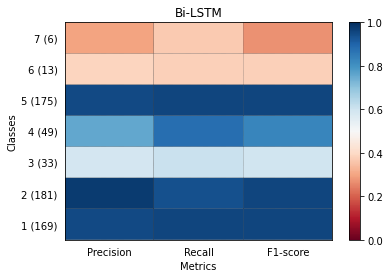

In [ ]:
def main():
    sampleClassificationReport = """             precision    recall  f1-score   support


           1       0.95      0.96      0.96       169
           2       0.98      0.94      0.96       181
           3       0.59      0.61      0.60        33
           4       0.76      0.88      0.83        49
           5       0.95      0.96      0.96       175
           6       0.39      0.38      0.38        13
           7       0.30      0.37      0.27         6
           8       0.80      0.96      0.87        50
"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

heat map for CNN

[0.99, 0.96, 0.98]
[1.0, 0.9, 0.95]
[0.5, 0.27, 0.35]
[0.39, 0.53, 0.45]
[0.85, 0.98, 0.91]
[0.35, 0.25, 0.33]
[0.29, 0.25, 0.3]
plotMat: [[0.99, 0.96, 0.98], [1.0, 0.9, 0.95], [0.5, 0.27, 0.35], [0.39, 0.53, 0.45], [0.85, 0.98, 0.91], [0.35, 0.25, 0.33], [0.29, 0.25, 0.3]]
support: [169, 181, 33, 49, 175, 13, 6]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

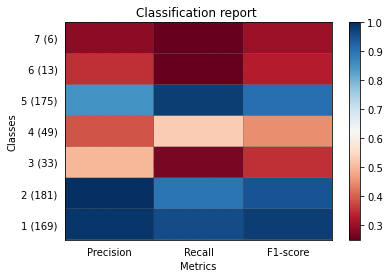

In [ ]:
def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

           1       0.99      0.96      0.98       169
           2       1.00      0.90      0.95       181
           3       0.50      0.27      0.35        33
           4       0.39      0.53      0.45        49
           5       0.85      0.98      0.91       175
           6       0.35      0.25      0.33        13
           7       0.29      0.25      0.30         6
           8       0.55      0.70      0.61        50
"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

In [ ]:
!pip install zip

     |████████████████████████████████| 1.7MB 4.6MB/s 
     |████████████████████████████████| 460kB 31.9MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 174kB 37.8MB/s 
     |████████████████████████████████| 112kB 29.9MB/s 
     |████████████████████████████████| 235kB 31.8MB/s 
     |████████████████████████████████| 2.7MB 32.2MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 92kB 12.2MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


heat map for GRU

[0.99, 0.96, 0.97]
[0.98, 0.96, 0.97]
[0.37, 0.21, 0.27]
[0.58, 0.68, 0.63]
[0.97, 0.96, 0.97]
[0.33, 0.34, 0.35]
[0.3, 0.33, 0.38]
plotMat: [[0.99, 0.96, 0.97], [0.98, 0.96, 0.97], [0.37, 0.21, 0.27], [0.58, 0.68, 0.63], [0.97, 0.96, 0.97], [0.33, 0.34, 0.35], [0.3, 0.33, 0.38]]
support: [169, 181, 33, 49, 175, 13, 6]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

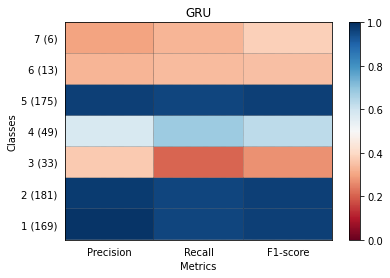

In [ ]:
def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

           1       0.99      0.96      0.97       169
           2       0.98      0.96      0.97       181
           3       0.37      0.21      0.27        33
           4       0.58      0.68      0.63        49
           5       0.97      0.96      0.97       175
           6       0.33      0.34      0.35        13
           7       0.30      0.33      0.38         6
           8       0.77      0.94      0.85        50
"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

heat map for naive-bayes

[0.77, 0.81, 0.76]
[0.59, 0.6, 0.55]
[0.4, 0.43, 0.46]
[0.47, 0.23, 0.48]
[0.83, 0.84, 0.88]
[0.2, 0.24, 0.28]
[0.26, 0.21, 0.34]
plotMat: [[0.77, 0.81, 0.76], [0.59, 0.6, 0.55], [0.4, 0.43, 0.46], [0.47, 0.23, 0.48], [0.83, 0.84, 0.88], [0.2, 0.24, 0.28], [0.26, 0.21, 0.34]]
support: [169, 181, 33, 49, 175, 13, 6]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

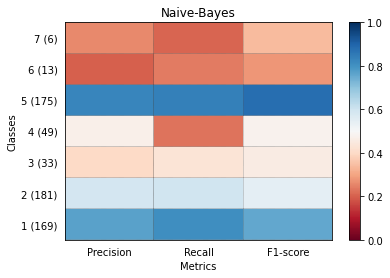

In [ ]:
def main():
    sampleClassificationReport = """             precision    recall  f1-score   support


           1       0.77      0.81      0.76       169
           2       0.59      0.60      0.55       181
           3       0.40      0.43      0.46        33
           4       0.47      0.23      0.48        49
           5       0.83      0.84      0.88       175
           6       0.20      0.24      0.28        13
           7       0.26      0.21      0.34         6
           8       1.00      0.21      0.34       125
"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

heat map for logreg

[0.84, 0.82, 0.85]
[0.88, 0.86, 0.87]
[0.38, 0.31, 0.39]
[0.67, 0.67, 0.67]
[0.8, 0.89, 0.84]
[0.3, 0.32, 0.38]
[0.38, 0.35, 0.3]
plotMat: [[0.84, 0.82, 0.85], [0.88, 0.86, 0.87], [0.38, 0.31, 0.39], [0.67, 0.67, 0.67], [0.8, 0.89, 0.84], [0.3, 0.32, 0.38], [0.38, 0.35, 0.3]]
support: [169, 181, 33, 49, 175, 13, 6]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

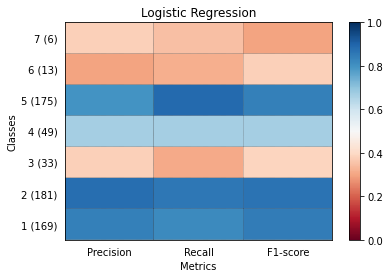

In [ ]:
def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

           1       0.84      0.82      0.85       169
           2       0.88      0.86      0.87       181
           3       0.38      0.31      0.39        33
           4       0.67      0.67      0.67        49
           5       0.80      0.89      0.84       175
           6       0.30      0.32      0.38        13
           7       0.38      0.35      0.30         6
           8       0.98      0.98      0.98       125
"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

heat map for sgd

[0.78, 0.77, 0.88]
[0.88, 0.83, 0.85]
[0.38, 0.31, 0.35]
[0.61, 0.66, 0.67]
[0.79, 0.82, 0.74]
[0.3, 0.32, 0.34]
[0.33, 0.35, 0.36]
plotMat: [[0.78, 0.77, 0.88], [0.88, 0.83, 0.85], [0.38, 0.31, 0.35], [0.61, 0.66, 0.67], [0.79, 0.82, 0.74], [0.3, 0.32, 0.34], [0.33, 0.35, 0.36]]
support: [169, 181, 33, 49, 175, 13, 6]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

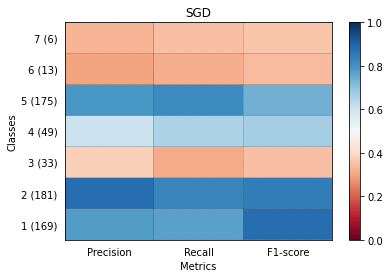

In [ ]:
def main():
    sampleClassificationReport = """             precision    recall  f1-score   support



           1       0.78      0.77      0.88       169
           2       0.88      0.83      0.85       181
           3       0.38      0.31      0.35        33
           4       0.61      0.66      0.67        49
           5       0.79      0.82      0.74       175
           6       0.30      0.32      0.34        13
           7       0.33      0.35      0.36         6
           8       0.85      0.78      0.86       125
"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

[0.96, 0.94, 0.98]
[0.94, 0.94, 0.95]
[0.85, 0.84, 0.9]
[0.87, 0.86, 0.9]
[0.97, 0.97, 0.97]
[0.8, 0.85, 0.88]
[0.78, 0.7, 0.75]
plotMat: [[0.96, 0.94, 0.98], [0.94, 0.94, 0.95], [0.85, 0.84, 0.9], [0.87, 0.86, 0.9], [0.97, 0.97, 0.97], [0.8, 0.85, 0.88], [0.78, 0.7, 0.75]]
support: [169, 181, 33, 49, 175, 13, 6]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

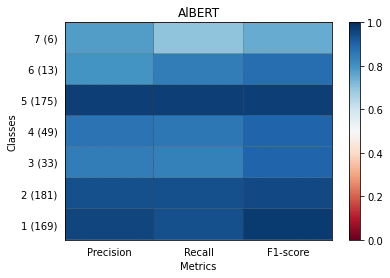

In [ ]:
def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

           1       0.96      0.94      0.98       169
           2       0.94      0.94      0.95       181
           3       0.85      0.84      0.90        33
           4       0.87      0.86      0.90        49
           5       0.97      0.97      0.97       175
           6       0.80      0.85      0.88        13
           7       0.78      0.70      0.75         6
           8       0.81      0.94      0.87        50
"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()